In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [92]:
df1 = pd.read_csv('../data/valor.csv')  # Valor
df2 = pd.read_csv('../data/quantidade.csv')     # Quantidade

            queijo        leite  doce_leite        ovos       suinos  \
count    29.000000    29.000000   29.000000   29.000000    29.000000   
mean    891.000000  1955.344828  127.206897  212.379310  1584.482759   
std     462.411459  1197.712739  134.674841  211.005148  1830.945474   
min       0.000000   123.000000    0.000000    0.000000     0.000000   
25%     660.000000   663.000000   15.000000    0.000000   180.000000   
50%     816.000000  2274.000000  105.000000  165.000000   750.000000   
75%    1280.000000  2700.000000  150.000000  345.000000  2800.000000   
max    1760.000000  4079.000000  440.000000  710.000000  6300.000000   

       hortalicas  
count   29.000000  
mean    76.448276  
std    104.749902  
min      0.000000  
25%      0.000000  
50%     63.000000  
75%    116.000000  
max    475.000000  


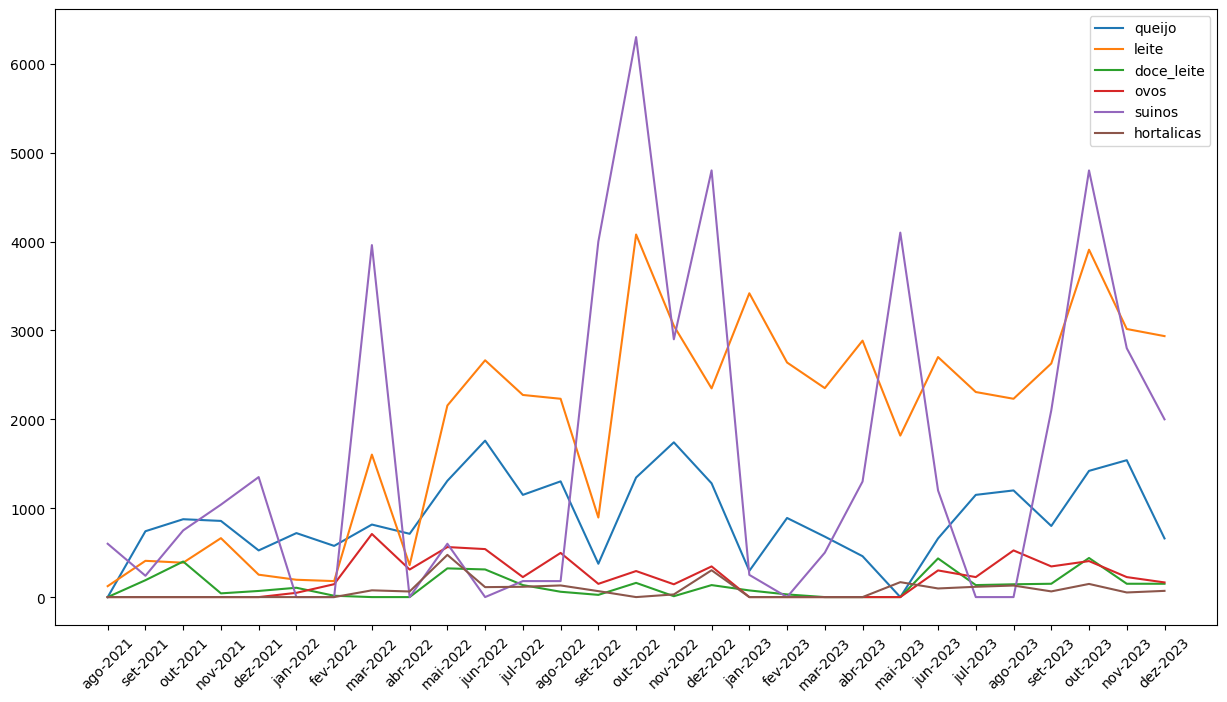

In [93]:
print(df1.describe())

plt.figure(figsize=(15, 8))
for col in df1.columns[2:]:
    plt.plot(df1['data'], df1[col], label=col)
plt.legend()
plt.xticks(rotation=45)
plt.show()

           queijo        leite  doce_leite       ovos     suinos  hortalicas
count   29.000000    29.000000   29.000000  29.000000  29.000000   29.000000
mean    50.620690   568.827586    9.379310  14.517241   5.034483   32.241379
std     26.863961   336.154521    9.286756  14.403920   5.314957   49.257817
min      0.000000    36.000000    0.000000   0.000000   0.000000    0.000000
25%     33.000000   213.000000    1.000000   0.000000   1.000000    0.000000
50%     56.000000   657.000000    7.000000  13.000000   4.000000    9.000000
75%     66.000000   775.000000   15.000000  23.000000   7.000000   49.000000
max    118.000000  1110.000000   29.000000  50.000000  18.000000  214.000000


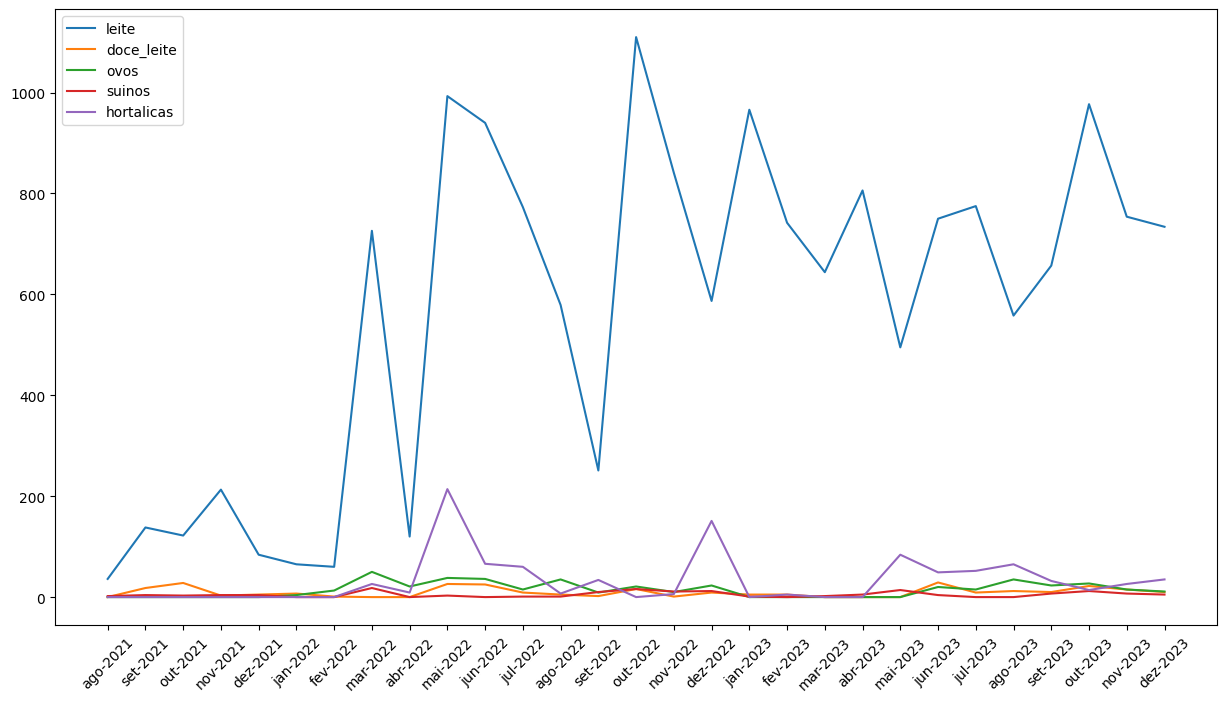

In [94]:
print(df2.describe())

plt.figure(figsize=(15, 8))
for col in df2.columns[2:]:
    plt.plot(df2['data'], df2[col], label=col)
plt.legend()
plt.xticks(rotation=45)
plt.show()

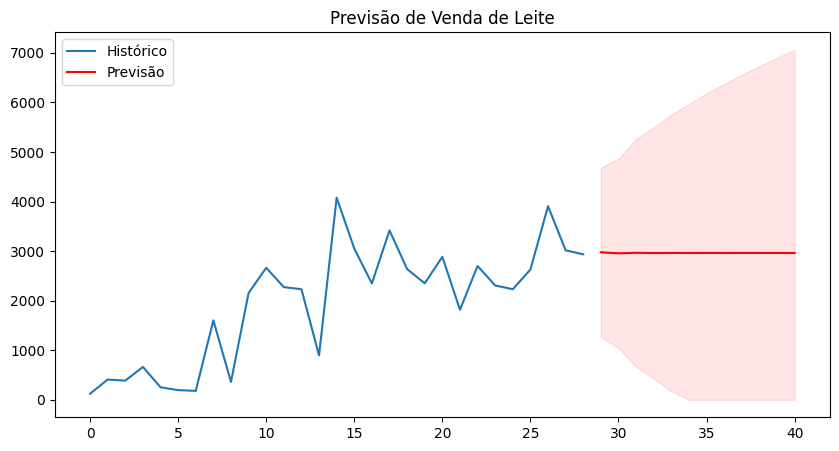

In [133]:
serie_leite = df1['leite'].dropna()

modelo = SARIMAX(serie_leite, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_leite, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Leite')
plt.legend()
plt.show()


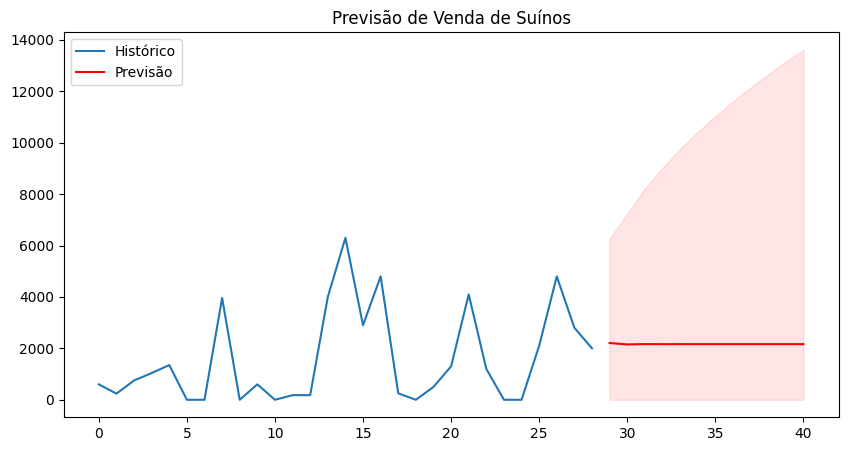

In [123]:
serie_suinos = df1['suinos'].dropna()

modelo = SARIMAX(serie_suinos, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_suinos, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Suínos')
plt.legend()
plt.show()


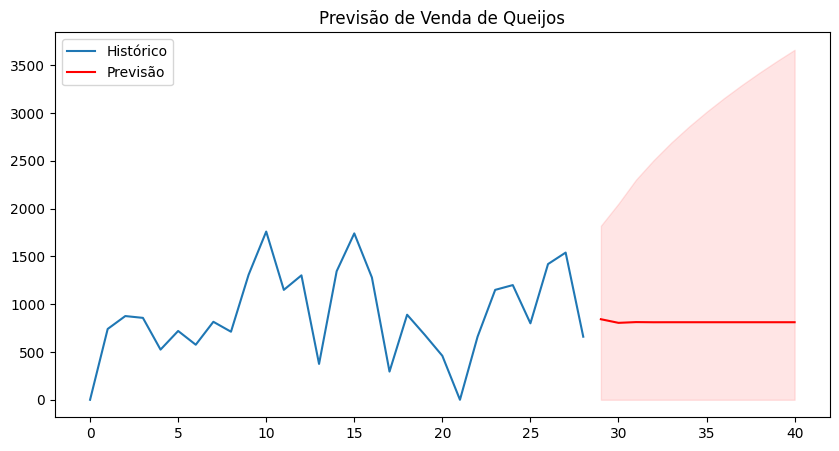

In [132]:
serie_queijo = df1['queijo'].dropna()

modelo = SARIMAX(serie_queijo, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_queijo, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Queijos')
plt.legend()
plt.show()


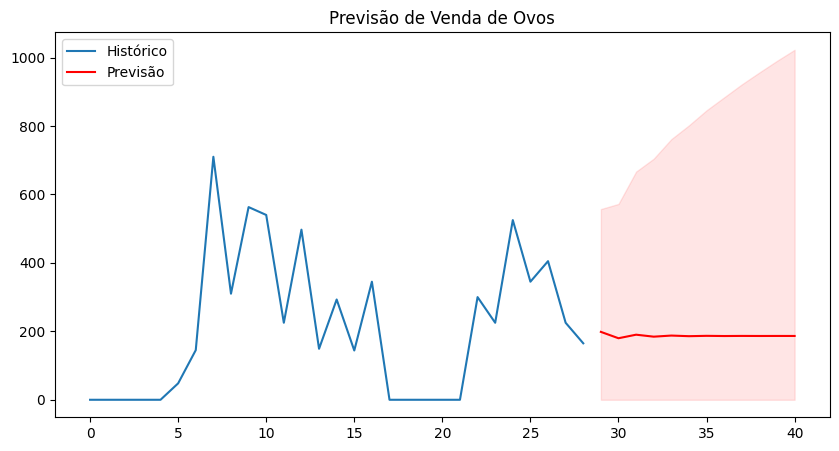

In [131]:
serie_ovos = df1['ovos'].dropna()

modelo = SARIMAX(serie_ovos, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_ovos, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Ovos')
plt.legend()
plt.show()


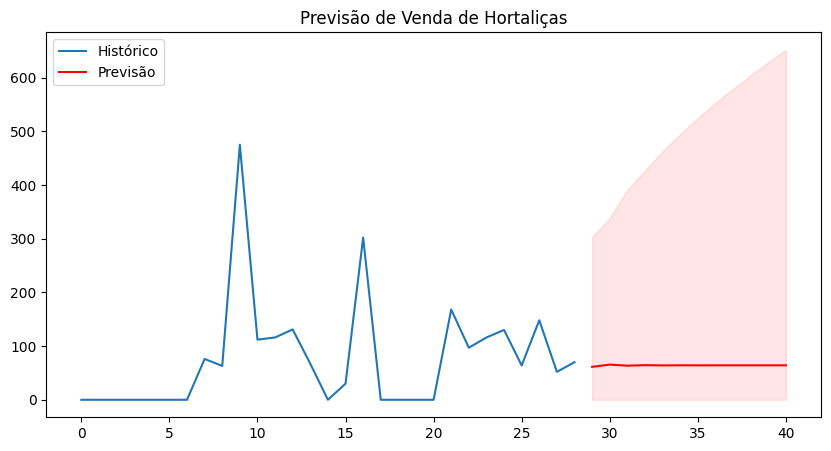

In [130]:
serie_hortalicas = df1['hortalicas'].dropna()

modelo = SARIMAX(serie_hortalicas, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_hortalicas, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Hortaliças')
plt.legend()
plt.show()


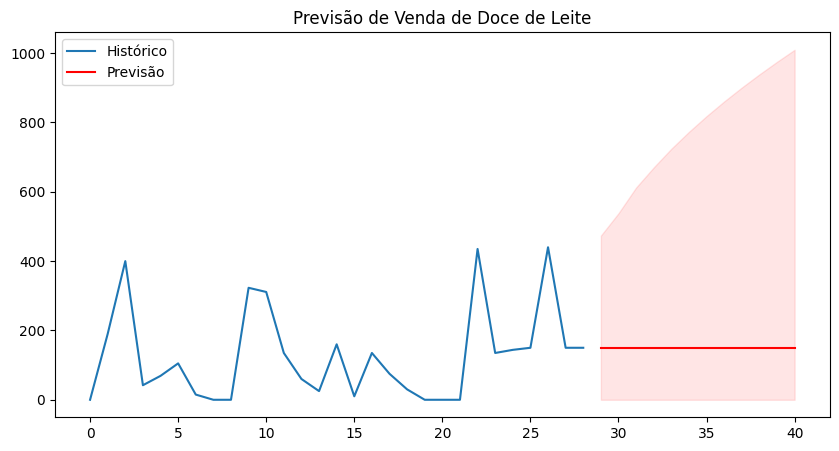

In [127]:
serie_doce_leite = df1['doce_leite'].dropna()

modelo = SARIMAX(serie_doce_leite, 
                order=(1,1,0),
                enforce_stationarity=False,
                enforce_invertibility=False)
resultado = modelo.fit(disp=False)

previsao = resultado.get_forecast(steps=12)
previsao_df = previsao.conf_int()
previsao_df['previsao'] = previsao.predicted_mean.clip(lower=0)
previsao_df.iloc[:,0] = previsao_df.iloc[:,0].clip(lower=0)

plt.figure(figsize=(10,5))
plt.plot(serie_doce_leite, label='Histórico')
plt.plot(previsao_df['previsao'], color='red', label='Previsão')
plt.fill_between(previsao_df.index,
                previsao_df.iloc[:,0],
                previsao_df.iloc[:,1],
                color='red', alpha=0.1)
plt.title('Previsão de Venda de Doce de Leite')
plt.legend()
plt.show()
